# Initial Validation Scratch Work

- [uproot Getting Started Guide](https://uproot.readthedocs.io/en/latest/basic.html)
- [pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)
- [matplotlib](https://matplotlib.org/stable/index.html)

In [1]:
import uproot
import pandas
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/home/laurenwills/ldmx/ecal-validation'

In [3]:
f = uproot.open('simulation_geometry_v12_events_10_run_1.root')

In [4]:
f.keys()

['LDMX_Events;1', 'LDMX_Run;1']

In [11]:
f['LDMX_Events'].keys()

['SimParticles_valid',
 'SimParticles_valid/SimParticles_valid.first',
 'SimParticles_valid/SimParticles_valid.second.energy_',
 'SimParticles_valid/SimParticles_valid.second.pdgID_',
 'SimParticles_valid/SimParticles_valid.second.genStatus_',
 'SimParticles_valid/SimParticles_valid.second.time_',
 'SimParticles_valid/SimParticles_valid.second.x_',
 'SimParticles_valid/SimParticles_valid.second.y_',
 'SimParticles_valid/SimParticles_valid.second.z_',
 'SimParticles_valid/SimParticles_valid.second.endX_',
 'SimParticles_valid/SimParticles_valid.second.endY_',
 'SimParticles_valid/SimParticles_valid.second.endZ_',
 'SimParticles_valid/SimParticles_valid.second.px_',
 'SimParticles_valid/SimParticles_valid.second.py_',
 'SimParticles_valid/SimParticles_valid.second.pz_',
 'SimParticles_valid/SimParticles_valid.second.endpx_',
 'SimParticles_valid/SimParticles_valid.second.endpy_',
 'SimParticles_valid/SimParticles_valid.second.endpz_',
 'SimParticles_valid/SimParticles_valid.second.mass_'

In [5]:
df = f['LDMX_Events'].arrays(filter_name='EcalSimHits_valid*',library='pd')

In [6]:
df['layer'] = (df['EcalSimHits_valid.id_'].values >> 17) & 0x3f

(array([132., 226., 124.,  86.,  56.,  50.,  42.,  35.,  26.,  22.,  24.,
         18.,  12.,   7.,  11.,  10.,   3.,   6.,   9.,   5.,   2.,   1.,
          4.,   2.,   0.,   2.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   2.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([8.79339990e-04, 1.23529382e-01, 2.46179417e-01, 3.68829459e-01,
        4.91479516e-01, 6.14129543e-01, 7.36779571e-01, 8.59429598e-01,
        9.82079685e-01, 1.10472965e+00, 1.22737980e+00, 1.35002983e+00,
        1.47267985e+00, 1.59532988e+00, 1.71797991e+00, 1.84062994e+00,
        1.96327996e+00, 2.08593011e+00, 2.20858002e+00, 2.33123016e+00,
        2.45388007e+00, 2.57653022e+00, 2.69918013e+00, 2.82183027e+00,
        2.94448042e+00, 3.06713033e+00, 3.18978047e+00, 3.31243038e+00,
        3.43508053e+00, 3.55773044e+00, 3.68038058e+00, 3.80303049e+00,
        3.92568064e+00, 4.04833078e+00, 4.17098093e+00, 4.29363060e+00,
        4.

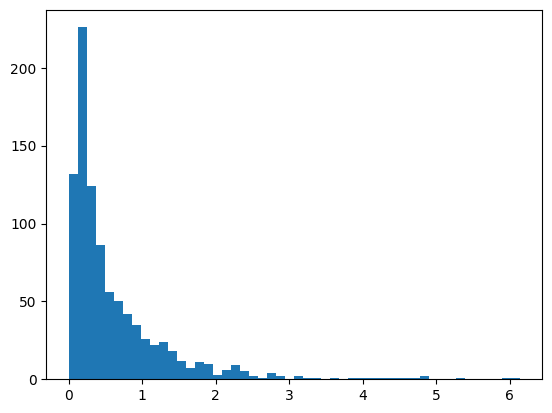

In [10]:
plt.hist(df['EcalSimHits_valid.edep_'],bins=50)

(array([ 45., 118., 251., 258., 125.,  84.,  27.,  17.,   5.,   1.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

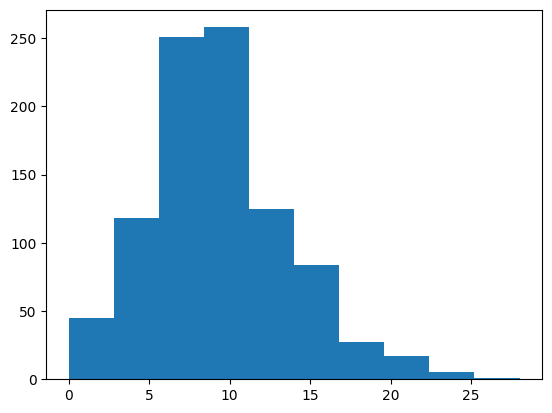

In [8]:
plt.hist(df['layer'])